Econ 202A Macroeconomics \
Fall 2021 \
Jon Steinsson

Problem Set 2

Steven Zheng \
<steven_zheng@berkeley.edu>

This notebook contains the code and output for parts c through l. Parts a and b are in the file `poly.py`, and part m is in the notebook `hw1_partm.ipynb`.

In [1]:
from Settings import *

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Part a
#### Write the household’s problem recursively. Be sure to state what variables are chosen and all the constraints.

We have the recursive problem
\begin{align*}
V(A,Y)=\max\left\{ \frac{C^{1-\gamma}}{1-\gamma}+\beta\mathbb{E}[V(A^{\prime},Y^{\prime})]\right\} 
\end{align*}
subject to the budget constraint
\begin{align*}
A_{t+1}=Z(Y_{t}-C_{t}+A_{t})^{\alpha}
\end{align*}
with labor income
\begin{align*}
\log Y_{t}=(1-\rho)\log\mu+\rho\log Y_{t-1}+\epsilon_{t}.
\end{align*}
We can rearrange the budget constraint as
\begin{align*}
A_{t+1}^{1/\alpha} & =Z^{1/\alpha}(Y_{t}-C_{t}+A_{t})\\
\iff\left(\frac{A_{t+1}}{Z}\right)^{1/\alpha} & =Y_{t}-C_{t}+A_{t}\\
\iff C_{t} & =Y_{t}+A_{t}-\left(\frac{A_{t+1}}{Z}\right)^{1/\alpha}
\end{align*}
so we can rewrite the recursive problem as
\begin{align*}
V(A,Y)=\max_{A^{\prime}\in\Gamma(A,Y)}\left\{ \frac{\left(Y+A-\left(\frac{A^{\prime}}{Z}\right)^{1/\alpha}\right)^{1-\gamma}}{1-\gamma}+\beta\mathbb{E}\left[V(A^{\prime},Y^{\prime})\right]\right\} .
\end{align*}

The choice variable are $A$ and $Y$. The parameter values are $\gamma=2$, $\beta=0.94$, $\mu=1$, $b=0.4$, $\rho=0.9$, $\sigma^2=0.01$, $r=0.05$, $\alpha=1/3$ and $Z=20$.

## Part b
#### Write a version of McKay’s PolyBasis function for this problem. Use a 2nd order polynomial basis (which will have 6 terms).

This is the function `PolyBasis()` in the file `poly.py`.

## Part c
#### Write a version of McKay's PolyGetCoeff function for this problem

This is the function `PolyGetCoef()` in the file `poly.py`.

## Part d
#### Start your main Matlab program by reading in the parameter values into a structure.

In [2]:
Par = {'gamma':2,
       'beta':0.94,
       'mu':1,
       'b':0.4,
       'rho':0.9,
       'sigma2':0.01,
       'sigma':np.sqrt(0.01),
       'r':0.05,
       'alpha':1/3,
       'Z':20}

## Part e
#### Create a grid on $A$ and $\log Y$. Feel free to use McKay’s `tauchen` function as needed. Use 7 grid points for $\log Y$ and 100 grid points for $A$. (Please create the grid for $\log Y$, not $Y$ . Uniformity will make grading easier.) Calculate the steady-state of $A$ using the first-order conditions of the sequence problem and the budget constraint. Then create an equally spaced grid from $0.05\overline{A}$ to $1.95\overline{A}$, where $\overline{A}$ is the steady state.

Let's calculate the steady-state of $A$ using the FOCs of the sequence
problem and the budget constraint.

The sequence problem is
\begin{align*}
\max_{\{C_{t}\}_{t=0}^{\infty}}\mathbb{E}_{0}\sum_{t=0}^{\infty}\beta^{t}\frac{C_{t}^{1-\gamma}}{1-\gamma}
\end{align*}
such that
\begin{align*}
A_{t+1} & =Z(Y_{t}-C_{t}+A_{t})^{\alpha}\\
\iff C_{t} & =Y_{t}+A_{t}-\left(\frac{A_{t+1}}{Z}\right)^{1/\alpha}.
\end{align*}
We can rewrite the sequence problem as
\begin{align*}
\max_{\{A_{t}\}_{t=1}^{\infty}}\mathbb{E}_{0}\sum_{t=0}^{\infty}\beta^{t}\frac{\left(Y_{t}+A_{t}-\left(\frac{A_{t+1}}{Z}\right)^{1/\alpha}\right)^{1-\gamma}}{1-\gamma}.
\end{align*}

Then take FOCs WRT $A_{t+1}$
\begin{align*}
0 & =\frac{\partial\mathcal{L}}{\partial A_{t+1}}\\
 & =\mathbb{E}_{0}\left[\beta^{t}\left(Y_{t}+A_{t}-\left(\frac{A_{t+1}}{Z}\right)^{1/\alpha}\right)^{-\gamma}\left(-\frac{1}{\alpha}\right)\left(\frac{A_{t+1}}{Z}\right)^{\frac{1}{\alpha}-1}\left(\frac{1}{Z}\right)+\beta^{t+1}\left(Y_{t+1}+A_{t+1}-\left(\frac{A_{t+2}}{Z}\right)^{1/\alpha}\right)^{-\gamma}\right].
\end{align*}
And note that at the steady-state, $\overline{X}\equiv X_{t}$ for
all $t$, so then
\begin{align*}
\mathbb{E}_{0}\left[\beta^{t}\left(\overline{Y}+\overline{A}-\left(\frac{\overline{A}}{Z}\right)^{1/\alpha}\right)^{-\gamma}\left(\frac{1}{\alpha}\right)\left(\frac{\overline{A}}{Z}\right)^{\frac{1}{\alpha}-1}\left(\frac{1}{Z}\right)\right] & =\mathbb{E}_{0}\left[\beta^{t+1}\left(\overline{Y}+\overline{A}-\left(\frac{\overline{A}}{Z}\right)^{1/\alpha}\right)^{-\gamma}\right]\\
\iff\left(\frac{1}{\alpha}\right)\left(\frac{\overline{A}}{Z}\right)^{\frac{1}{\alpha}-1}\left(\frac{1}{Z}\right) & =\beta\\
\iff\left(\frac{\overline{A}}{Z}\right)^{\frac{1-\alpha}{\alpha}} & =\alpha\beta Z\\
\iff\overline{A} & =\left(\alpha\beta\right)^{\frac{\alpha}{1-\alpha}}Z^{\frac{1}{1-\alpha}}.
\end{align*}

In [3]:
## Calculate A_bar
A_bar = np.power(Par['alpha']*Par['beta'],Par['alpha']/(1-Par['alpha'])) *\
        np.power(Par['Z'],1/(1-Par['alpha']))
Par['A_bar'] = A_bar
print(A_bar)

50.06662228138288


In [4]:
## Grid for A_bar
LB_A = 0.05*A_bar
UB_A = 1.95*A_bar
n_A = 100
grid_A = np.linspace(start=LB_A,
                     stop=UB_A,
                     num=n_A)


In [5]:

## Grid on logY using the Tauchen method
## Note: I copy Alisdair's tauchen() function into Python. 
## It's in `Settings/tauchen.py`.
n_logY = 7
mean_logY = np.log(Par['mu'])
numstd_logY = 4

grid_logY, grid_PlogY = tauchen(N=n_logY,
                                mu=mean_logY,
                                rho=Par['rho'],
                                sigma=Par['sigma'],
                                m=numstd_logY)
grid_PlogY = grid_PlogY.T

## Column vectors
AA = np.tile(grid_A,n_logY)
#logYY = np.tile(grid_logY,n_A)
logYY = np.reshape([np.repeat(x,n_A) for x in grid_logY],n_logY*n_A)
## Put it all in a dict, like matlab struct
Grid = {'n_A':n_A,
        'LB_A':LB_A,
        'UB_A':UB_A,
        'A':grid_A,
        'AA':AA,
        'n_logY':n_logY,
        'logY':grid_logY,
        'PlogY':grid_PlogY,
        'logYY':logYY}

In [6]:
## Note: the (i,j) element is the probability of getting to i from j
## i.e., this notation i<-j
print(Grid['PlogY'].sum(axis=0))

[1. 1. 1. 1. 1. 1. 1.]


## Part f
#### Write a version of McKay's Bellman Matlab function for this problem. To do this, you will need to solve for consumption $C_t$ as a function of variables $A_t$, $A_{t+1}$, $Y_t$.

We have from the budget constraint
\begin{align*}
C_{t} & =Y_{t}+A_{t}-\left(\frac{A_{t+1}}{Z}\right)^{1/\alpha}.
\end{align*}

The function `Bellman()` is in `Settings/bellman.py`.

## Part g
#### Write a version of McKay's MaxBellman function for this problem. Similarly to McKay's problem make sure to bound the upper constraint such that consumption is positive. Additionally, make sure that the choices of next period's assets are bounded to be within the upper and lower bounds of the grid

This is the function `MaxBellman()` in `Settings/maxbellman.py`.

## Part h
#### Write the value function iteration for-loop for this problem. Once the iterations converge, plot the value function, policy function, and the consumption on the meshgrid of $(A,Y)$ using the `surf` function in Matlab.

In [7]:
## Set up initial
basis = PolyBasis(X=Grid['AA'],
                  Y=Grid['logYY'])
b0 = np.zeros(basis.shape[1])
Ap0 = np.ones(Grid['AA'].shape)
MAXIT = 1000

In [8]:
for i in range(0,MAXIT):

    ## Calculate max, given coefficients
    ## Initialized or from previous step
    V,Ap = MaxBellman(Par=Par,
                      b=b0,
                      Grid=Grid)

    ## Expectation of value function WRT previous Y
    V_reshaped = np.reshape(V,
                            (Grid['n_A'],Grid['n_logY']),
                            order='F')
    EV = np.dot(V_reshaped,Grid['PlogY'])

    ## Update polynomial coefficients
    b = PolyGetCoef(X=Grid['AA'],
                    Y=np.exp(Grid['logYY']),
                    Z=np.reshape(EV,
                                 EV.size,
                                 order='F'))
    
    ## Check change and update
    epsilon = np.max(np.abs(b0-b))
    b0 = b

    print('Iteration: '+str(i+1)+', epsilon: '+str(epsilon))
    #sys.stdout.('Iteration: '+str(i+1)+', epsilon: '+str(epsilon))
    #sys.stdout.flush()
    if epsilon < 1e-7:
        break

Iteration: 1, epsilon: 0.15912130165233182
Iteration: 2, epsilon: 0.10653170450841434
Iteration: 3, epsilon: 0.0632917981090026
Iteration: 4, epsilon: 0.03674929743906058
Iteration: 5, epsilon: 0.022182801767562932
Iteration: 6, epsilon: 0.014515366864825074
Iteration: 7, epsilon: 0.010465409327406028
Iteration: 8, epsilon: 0.00823624842811127
Iteration: 9, epsilon: 0.006913696161756022
Iteration: 10, epsilon: 0.006047940975225263
Iteration: 11, epsilon: 0.005420524699380147
Iteration: 12, epsilon: 0.004925323386809621
Iteration: 13, epsilon: 0.004510137047175122
Iteration: 14, epsilon: 0.004148567976893003
Iteration: 15, epsilon: 0.003826604551126711
Iteration: 16, epsilon: 0.0035362446983919216
Iteration: 17, epsilon: 0.003272465782574452
Iteration: 18, epsilon: 0.0030317798425633646
Iteration: 19, epsilon: 0.0028115389361110243
Iteration: 20, epsilon: 0.002609595550964239
Iteration: 21, epsilon: 0.0024241315266044228
Iteration: 22, epsilon: 0.00225356743916183
Iteration: 23, epsilon

In [9]:
## Reshape value function
V_reshaped = np.reshape(V,
                        (Grid['n_A'],Grid['n_logY']),
                        order='F')

## Policy function
## And reshape for plot
V_tmp,policy_function = MaxBellman(Par=Par,
                                   b=b,
                                   Grid=Grid)
policy_function_reshaped = np.reshape(policy_function,
                                      (Grid['n_A'],Grid['n_logY']),
                                      order='F')

## Consumption
C = np.exp(Grid['logYY']) + Grid['AA'] -\
    np.power(Ap/Par['Z'],1/Par['alpha'])
C_reshaped = np.reshape(C,
                        (Grid['n_A'],Grid['n_logY']),
                        order='F')

In [10]:
## Plot
grid_A,grid_logY = np.meshgrid(Grid['A'],Grid['logY'])
grid_A = grid_A.T
grid_logY = grid_logY.T
grid_Y = np.exp(grid_logY)

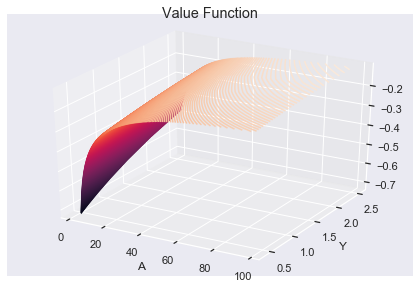

In [11]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.contour3D(grid_A,
             grid_Y,
             V_reshaped,
             500)
ax.set_xlabel('A')
ax.set_ylabel('Y')
plt.suptitle('Value Function')
plt.tight_layout()
plt.show()

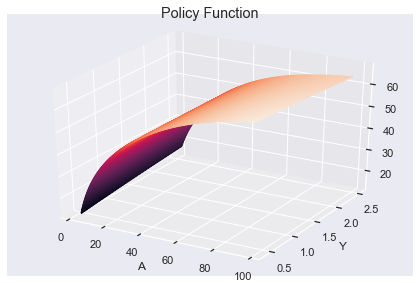

In [12]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.contour3D(grid_A,
             grid_Y,
             policy_function_reshaped,
             500)
ax.set_xlabel('A')
ax.set_ylabel('Y')
plt.suptitle('Policy Function')
plt.tight_layout()
plt.show()

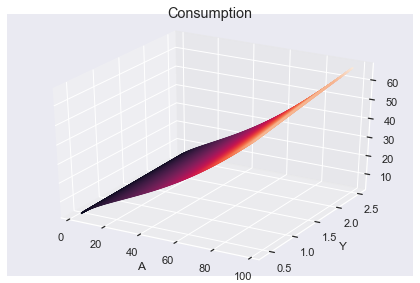

In [13]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.contour3D(grid_A,
             grid_Y,
             C_reshaped,
             500)
ax.set_xlabel('A')
ax.set_ylabel('Y')
plt.suptitle('Consumption')
plt.tight_layout()
plt.show()

## Part j
#### Adapt McKay's `Simulate` function for this problem.

This is the function `Simulate()` in `Settings/simulate.py`.

## Part K
#### Using your new `Simulate` function, produce a 10,000 period simulation of the evolution of $A$, $Y$,and $C$.  Report a histogram of $A$, $Y$, and $C$.  (Note: $Y_t$ not $\log Y_t$.)  Report the mean and standard deviation of each variable. Plot the evolution of $A$, $Y$, and $C$ over a 100 period stretch starting from period 1000. How do these mean values compare to the steady-state values calculated earlier?

The histogram, mean and standard deviation, and evolution of $A$, $Y$, and $C$ are below.

The mean of $A$ is around 62 and the steady state was around 50. This is pretty different since the standard deviation is around 0.2. $Y$ does not have a steady state as it is a AR(1) process. The mean should be $\mu=1$ and the mean from the simulation is also around 1. $C$ has a mean of 33 and the steady-state is around 35.

In [14]:
## Steady-state consumption
Par['mu'] + A_bar - np.power(A_bar/Par['Z'],1/Par['alpha'])

35.37908063321626

In [15]:
## Run simulation and combine into one panda
bAp = PolyGetCoef(X=Grid['AA'],
                  Y=np.exp(Grid['logYY']),
                  Z=policy_function)
Sim = Simulate(Par=Par,
               bAp=bAp,
               Mode='random',
               T=10000)
Sim_results = pd.DataFrame({'A':Sim['A'],
                            'Y':np.exp(Sim['logY']),
                            'C':Sim['C']})

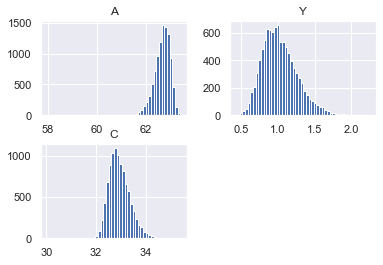

In [16]:
## Histogram
Sim_results.hist(bins=50)
plt.show()

In [17]:
## Mean and standard deviation
Sim_results.agg(['mean','std'])

,A,Y,C
mean,62.650156,1.024770,32.933948
std,0.314369,0.238291,0.422254


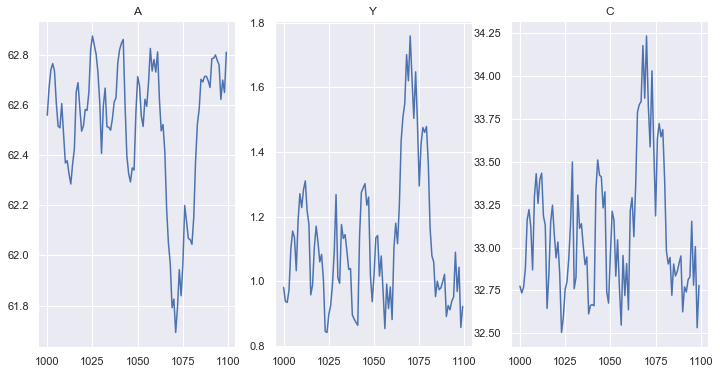

In [18]:
## Plot simulation for A, Y ,C
fig, axes = plt.subplots(nrows=1, 
                         ncols=3,
                         figsize=(12,6),
                         sharex=False)

Sim_results.iloc[1000:1100]\
           ['A']\
           .plot(ax=axes[0],
                 title='A')

Sim_results.iloc[1000:1100]\
           ['Y']\
           .plot(ax=axes[1],
                 title='Y')

Sim_results.iloc[1000:1100]\
           ['C']\
           .plot(ax=axes[2],
                 title='C')

## Part l
#### Plot consumption as a function of $A$ for several values of $Y$. Do this for the entire range of $A$ on your grid.

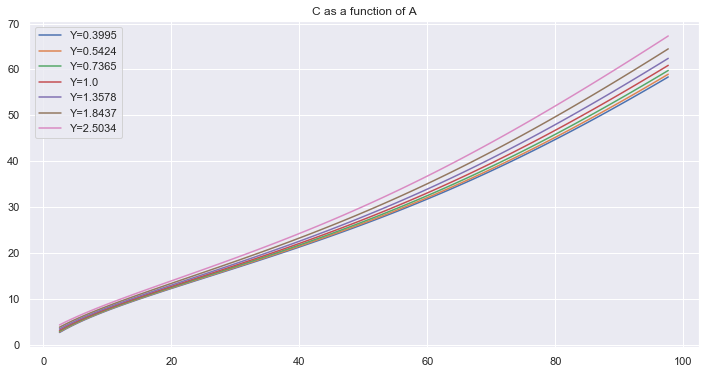

In [31]:
C_pd = pd.DataFrame(C_reshaped,
                    columns=['Y='+str(x.round(4)) for x in np.exp(Grid['logY'])],
                    index=Grid['A'])
C_pd.plot(figsize=(12,6),
          title='C as a function of A')

## Part m
#### Plot change in assets $Y-C$ as a function of $A$ for several values of $Y$. Do this for the entire range of $A$ on your grid.

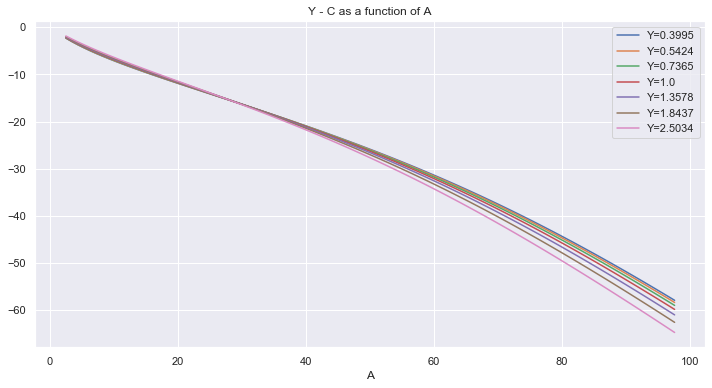

In [20]:
## Y - C for each Y in the grid
Y_less_C_pd = (C_pd.copy() - np.exp(Grid['logY'])) * (-1.0)
Y_less_C_pd.plot(figsize=(12,6),
                 title='Y - C as a function of A')

## Part n
#### Plot the marginal propensity to consume as a function of A for several values of Y . Do this for the entire range of A on your grid. You can approximate the marginal propensity to consume as the extra consumption in the period that results from a windfall gain of 1 unit of A. Does this plot make economic sense? (Hint: It might not due to the limitations of the polynomial approximation methods we are using in this problem set.)

The MPCs are upward sloping in wealth, which is not realistic. This may be due to the limitations of the polynomial approximation methods we're using. It may also be due to our specification of the budget constraint with curvature, as households can accumulate assets very quickly -- they are gaining more wealth than able to consume, so the more wealth they have the more they consume.

In [84]:
bC = PolyGetCoef(X=Grid['AA'],
                 Y=np.exp(Grid['logYY']),
                 Z=C)

## Define new grid for MPC
## Approx MPC as extra consumption of 1 A
Grid_mpc = Grid.copy()
Grid_mpc['AA'] = Grid_mpc['AA']+1.0

In [114]:
C_approx = np.reshape(np.dot(PolyBasis(X=Grid['AA'],Y=np.exp(Grid['logYY'])),
                             bC),
                      (100,7),
                      order='F')
C_approx_mpc = np.reshape(np.dot(PolyBasis(X=Grid_mpc['AA'],Y=np.exp(Grid_mpc['logYY'])),
                                 bC),
                          (100,7),
                          order='F')
C_mpc_pd = pd.DataFrame(C_approx_mpc-C_approx,
                        columns=['Y='+str(x.round(4)) for x in np.exp(Grid['logY'])],
                        index=Grid['A'])

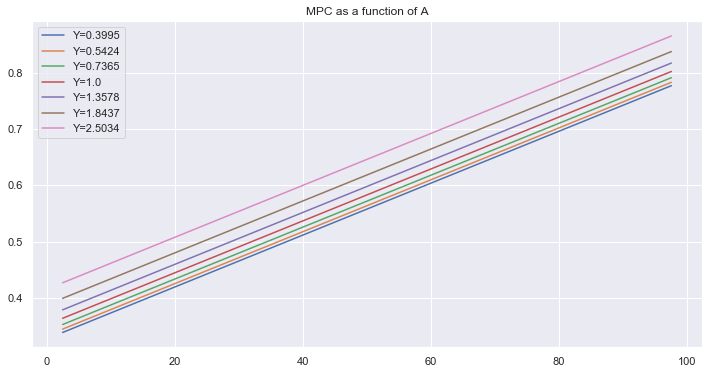

In [115]:
## Y - C for each Y in the grid
C_mpc_pd.plot(figsize=(12,6),
              title='MPC as a function of A')